In [32]:
import requests
import pandas as pd

def get_weekly_weather(api_key, cities, country):
    # List to store weather data for all cities
    all_weekly_weather = []

    for city in cities:
        url = f'http://api.openweathermap.org/data/2.5/forecast?q={city},{country}&appid={api_key}'
        response = requests.get(url)
        data = response.json()

        # 'list' key contains daily weather information
        if 'list' in data:
            weekly_weather = []
            for entry in data['list']:
                date = entry['dt_txt'].split()[0]  # Extract date information
                weather_condition = entry['weather'][0]['main']
                temperature = entry['main']['temp']
                humidity = entry['main']['humidity']
                wind_speed = entry['wind']['speed']
                atmospheric_pressure = entry['main']['pressure']
                weekly_weather.append([date, weather_condition, temperature, humidity, wind_speed, atmospheric_pressure])

            # Create a DataFrame for the current city
            columns = ["Date", "Condition", "Temperature (Celsius)", "Humidity (%)", "Wind Speed (m/s)", "Pressure (hPa)"]
            city_weather_df = pd.DataFrame(weekly_weather, columns=columns)

            # Add the DataFrame to the list
            all_weekly_weather.append({"City": city, "WeatherData": city_weather_df})
        else:
            print(f"Could not find weekly weather data for {city} in the API response.")

    return all_weekly_weather

api_key = "e00693dc6f9c360b3b1cb0d1686404a8"
cities = ['Busan', 'Seoul','Ulsan','Incheon','Daegu']
country = 'KR'

all_city_weather = get_weekly_weather(api_key, cities, country)

# Concatenate weather data for all cities into a single DataFrame
all_weather_df = pd.concat([city_weather['WeatherData'] for city_weather in all_city_weather], ignore_index=True)

# 데이터프레임
all_weather_df


,Date,Condition,Temperature (Celsius),Humidity (%),Wind Speed (m/s),Pressure (hPa)
0,2023-11-21,Clear,285.39,64,4.19,1020
1,2023-11-21,Clear,285.27,68,4.56,1020
2,2023-11-21,Clear,284.88,71,4.25,1020
3,2023-11-21,Clear,284.36,72,3.69,1020
4,2023-11-22,Clear,285.63,69,3.04,1020
...,...,...,...,...,...,...
195,2023-11-25,Clouds,272.21,31,0.57,1030
196,2023-11-26,Clouds,275.23,26,1.24,1030
197,2023-11-26,Clouds,279.93,20,1.59,1027
198,2023-11-26,Clouds,281.18,26,1.49,1024


In [33]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Convert weather conditions to numerical labels
label_encoder = LabelEncoder()
all_weather_df['Condition_Label'] = label_encoder.fit_transform(all_weather_df['Condition'])

# Select features and labels
features = all_weather_df[['Temperature (Celsius)', 'Humidity (%)', 'Wind Speed (m/s)', 'Pressure (hPa)']]
labels = all_weather_df['Condition_Label']

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(features_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')  # 4 classes: clear, rain, cloud, snow
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')


Epoch 1/100
4/4 [==============================] - 2s 168ms/step - loss: 1.3299 - accuracy: 0.4219 - val_loss: 1.2682 - val_accuracy: 0.5312
Epoch 2/100
4/4 [==============================] - 0s 47ms/step - loss: 1.2112 - accuracy: 0.5469 - val_loss: 1.1922 - val_accuracy: 0.5000
Epoch 3/100
4/4 [==============================] - 0s 50ms/step - loss: 1.1035 - accuracy: 0.5469 - val_loss: 1.1383 - val_accuracy: 0.5000
Epoch 4/100
4/4 [==============================] - 0s 52ms/step - loss: 1.0195 - accuracy: 0.5469 - val_loss: 1.0995 - val_accuracy: 0.5000
Epoch 5/100
4/4 [==============================] - 0s 48ms/step - loss: 0.9546 - accuracy: 0.5547 - val_loss: 1.0745 - val_accuracy: 0.5000
Epoch 6/100
4/4 [==============================] - 0s 25ms/step - loss: 0.9013 - accuracy: 0.5703 - val_loss: 1.0595 - val_accuracy: 0.4375
Epoch 7/100
4/4 [==============================] - 0s 27ms/step - loss: 0.8562 - accuracy: 0.5469 - val_loss: 1.0497 - val_accuracy: 0.4375
Epoch 8/100
4/4 [==

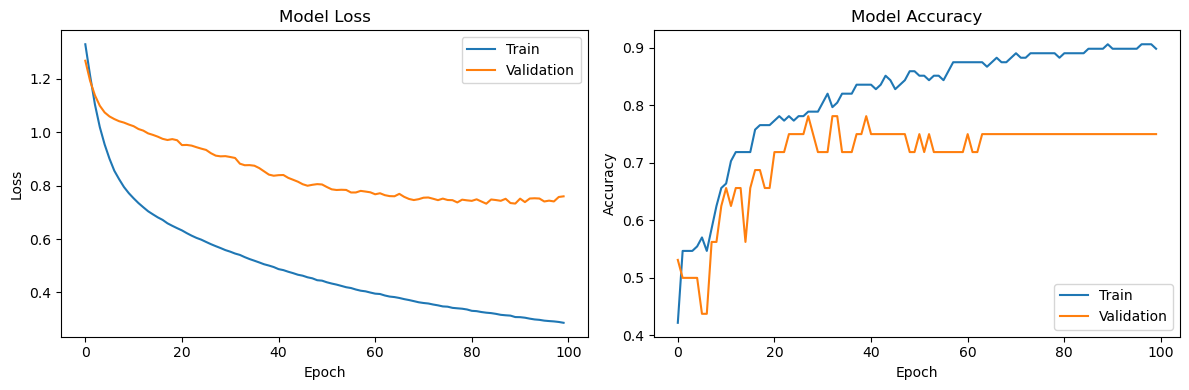

In [34]:
import matplotlib.pyplot as plt


# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()


Test Set Accuracy: 85.00%


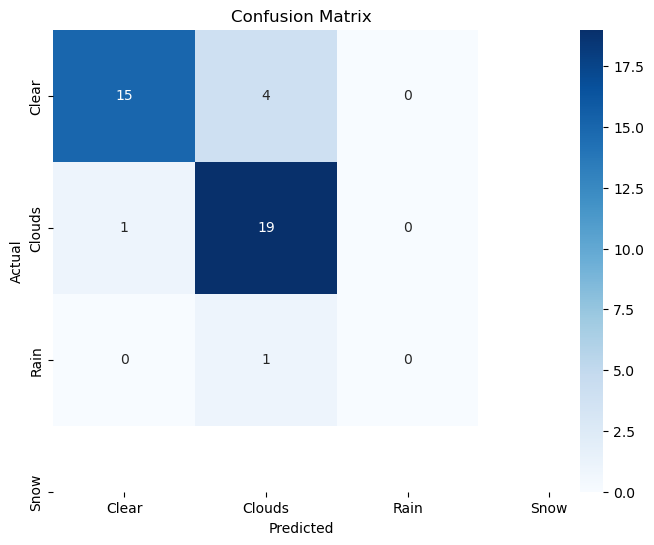

ValueError: Number of classes, 3, does not match size of target_names, 4. Try specifying the labels parameter

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 예측된 레이블과 실제 레이블 비교
correct_predictions = (predicted_labels.numpy() == y_test.values)

# 정확도 계산
accuracy = sum(correct_predictions) / len(correct_predictions)
print(f'Test Set Accuracy: {accuracy * 100:.2f}%')

# 혼동 행렬 생성
conf_matrix = confusion_matrix(y_test, predicted_labels)

# seaborn을 사용하여 혼동 행렬을 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 분류 보고서 출력
class_names = label_encoder.classes_
classification_rep = classification_report(y_test, predicted_labels, target_names=class_names)
print("Classification Report:\n", classification_rep)
